In [103]:
import pandas as pd

In [104]:
df2=pd.read_csv("/content/Final_Merged_Win_Prediction_Dataset.csv")
df2

,match_date,venue,team,over_number,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,inning_number,ball_number,cumulative_runs,cumulative_wickets,balls_remaining,target,runs_remaining,current_rr,required_rr,result
0,04-01-2003,"Davies Park, Queenstown",New Zealand,0,SP Fleming,J Srinath,NJ Astle,0,0,0,2,1,0,0,299,122,122,0.000000,2.448161,1
1,04-01-2003,"Davies Park, Queenstown",New Zealand,0,SP Fleming,J Srinath,NJ Astle,3,0,3,2,2,3,0,298,122,119,9.000000,2.395973,1
2,04-01-2003,"Davies Park, Queenstown",New Zealand,0,NJ Astle,J Srinath,SP Fleming,0,0,0,2,3,3,0,297,122,119,6.000000,2.404040,1
3,04-01-2003,"Davies Park, Queenstown",New Zealand,0,NJ Astle,J Srinath,SP Fleming,2,0,2,2,4,5,0,296,122,117,7.500000,2.371622,1
4,04-01-2003,"Davies Park, Queenstown",New Zealand,0,NJ Astle,J Srinath,SP Fleming,0,0,0,2,5,5,0,295,122,117,6.000000,2.379661,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,30-08-2007,Old Trafford,England,47,SCJ Broad,RP Singh,RS Bopara,0,0,0,2,294,210,7,6,213,3,4.285714,3.000000,1
9067,30-08-2007,Old Trafford,England,47,SCJ Broad,RP Singh,RS Bopara,2,0,2,2,295,212,7,5,213,1,4.311864,1.200000,1
9068,30-08-2007,Old Trafford,England,47,SCJ Broad,RP Singh,RS Bopara,0,0,0,2,296,212,7,4,213,1,4.297297,1.500000,1
9069,30-08-2007,Old Trafford,England,47,SCJ Broad,RP Singh,RS Bopara,0,0,0,2,297,212,7,3,213,1,4.282828,2.000000,1


FEATURE ENGINEEERING

In [105]:
df2['wickets_remaining'] = 10 - df2['cumulative_wickets']
df2['run_rate_diff'] = df2['current_rr'] - df2['required_rr']
df2['over_number'] = df2['ball_number'] // 6  # Convert balls to over-level

In [106]:
feature_cols = [
    'cumulative_runs',         # Runs scored so far
    'cumulative_wickets',      # Wickets lost so far
    'ball_number',             # Balls bowled so far
    'balls_remaining',         # Balls remaining (max 300 for ODI)
    'runs_remaining',          # Target - cumulative_runs
    'current_rr',              # Run rate so far
    'required_rr',             # Required run rate
    'wickets_remaining',       # 10 - wickets lost
    'run_rate_diff',           # current_rr - required_rr
    'over_number'              # Over number
]

In [107]:
X = df2[feature_cols]

In [108]:
# Force numeric and fill any hidden NaNs
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.mean(numeric_only=True))
y = df2['result']
y = pd.to_numeric(y, errors='coerce').fillna(0).astype(int)

In [109]:
df = X.copy()
df['label'] = y
df = df.dropna()

X_clean = df.drop(columns=['label'])
y_clean = df['label']

In [110]:
X

,cumulative_runs,cumulative_wickets,ball_number,balls_remaining,runs_remaining,current_rr,required_rr,wickets_remaining,run_rate_diff,over_number
0,0,0,1,299,122,0.000000,2.448161,10,-2.448161,0
1,3,0,2,298,119,9.000000,2.395973,10,6.604027,0
2,3,0,3,297,119,6.000000,2.404040,10,3.595960,0
3,5,0,4,296,117,7.500000,2.371622,10,5.128378,0
4,5,0,5,295,117,6.000000,2.379661,10,3.620339,0
...,...,...,...,...,...,...,...,...,...,...
9066,210,7,294,6,3,4.285714,3.000000,3,1.285714,49
9067,212,7,295,5,1,4.311864,1.200000,3,3.111864,49
9068,212,7,296,4,1,4.297297,1.500000,3,2.797297,49
9069,212,7,297,3,1,4.282828,2.000000,3,2.282828,49


In [111]:
y = y.loc[X.index]

In [112]:
print("Remaining missing values per column:")
print(X.isnull().sum())

Remaining missing values per column:
cumulative_runs       0
cumulative_wickets    0
ball_number           0
balls_remaining       0
runs_remaining        0
current_rr            0
required_rr           0
wickets_remaining     0
run_rate_diff         0
over_number           0
dtype: int64


In [113]:
print(len(X), len(y))  #  To Check if they're equal

9071 9071


In [114]:
missing_rows = X[X.isnull().any(axis=1)]
print(missing_rows.index.tolist())

[]


<Axes: >

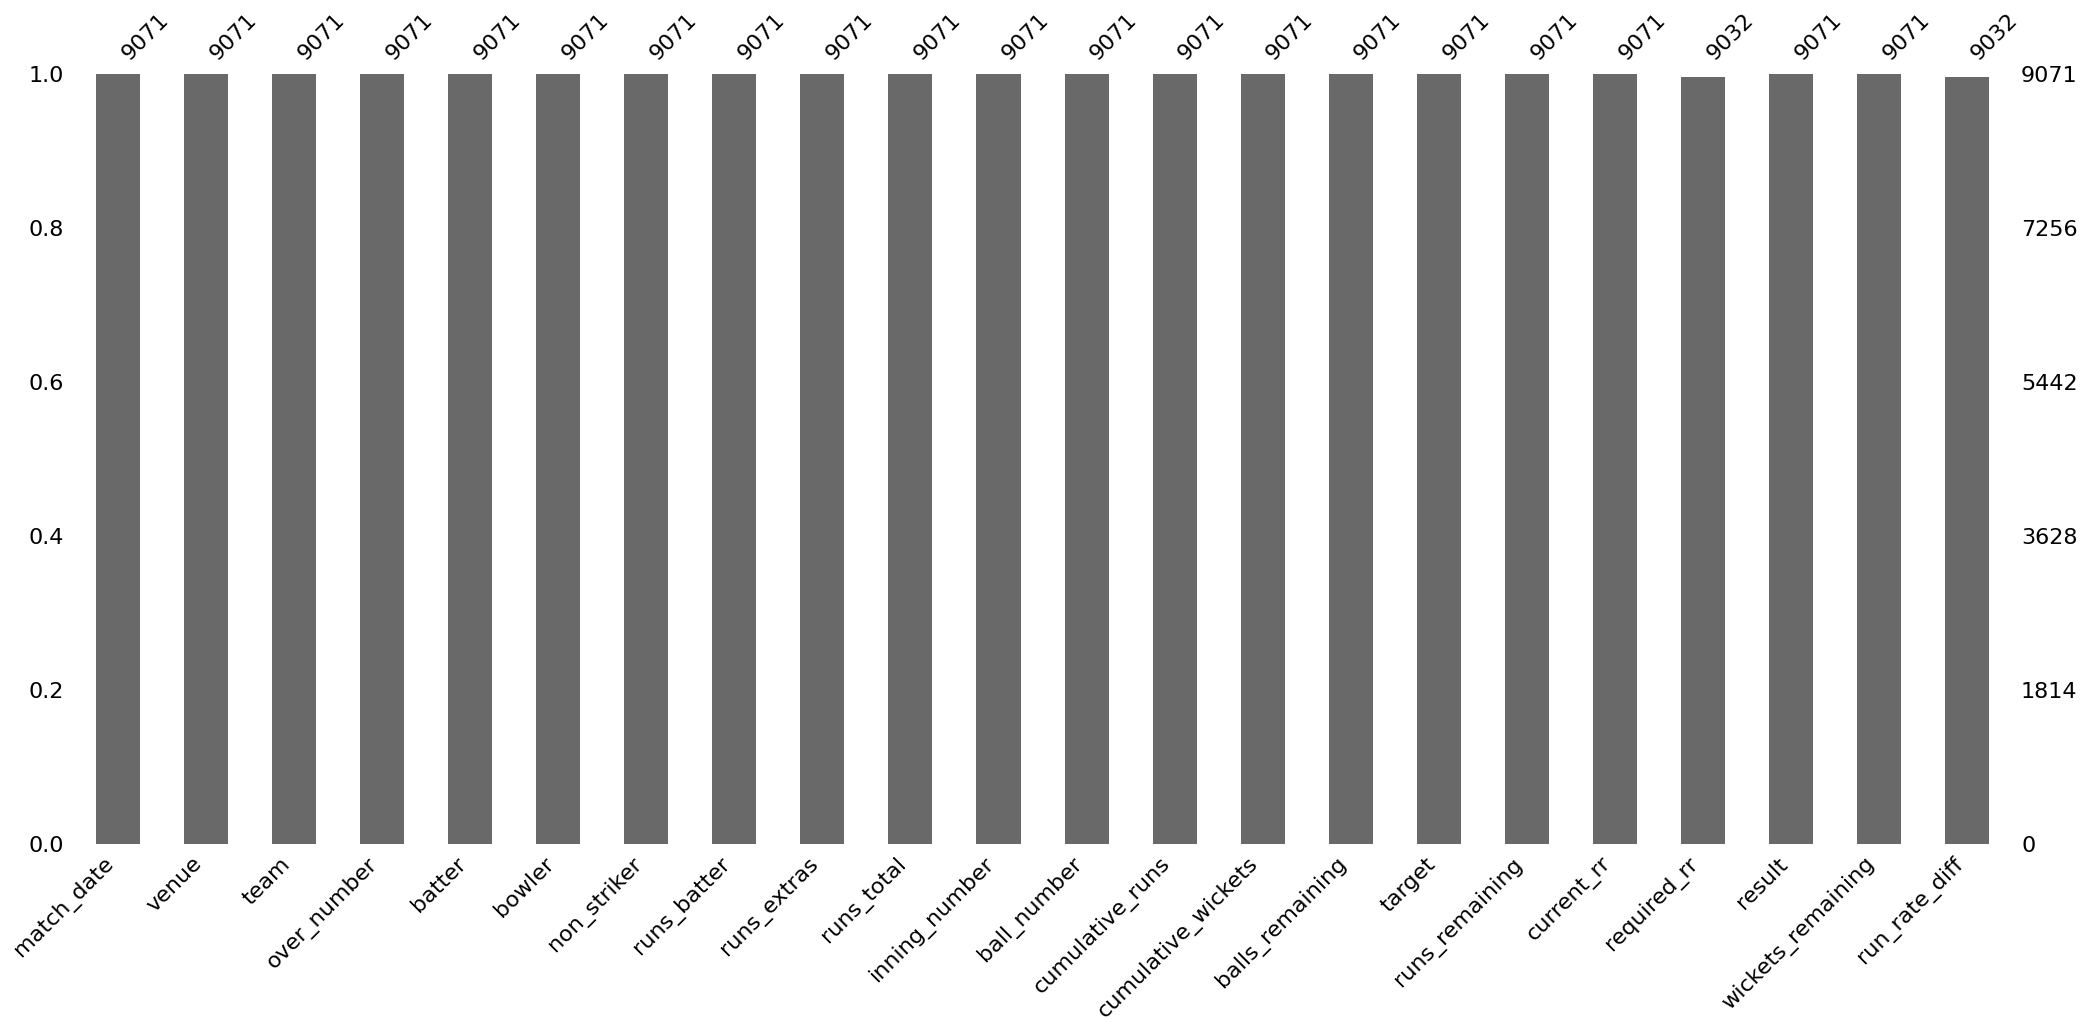

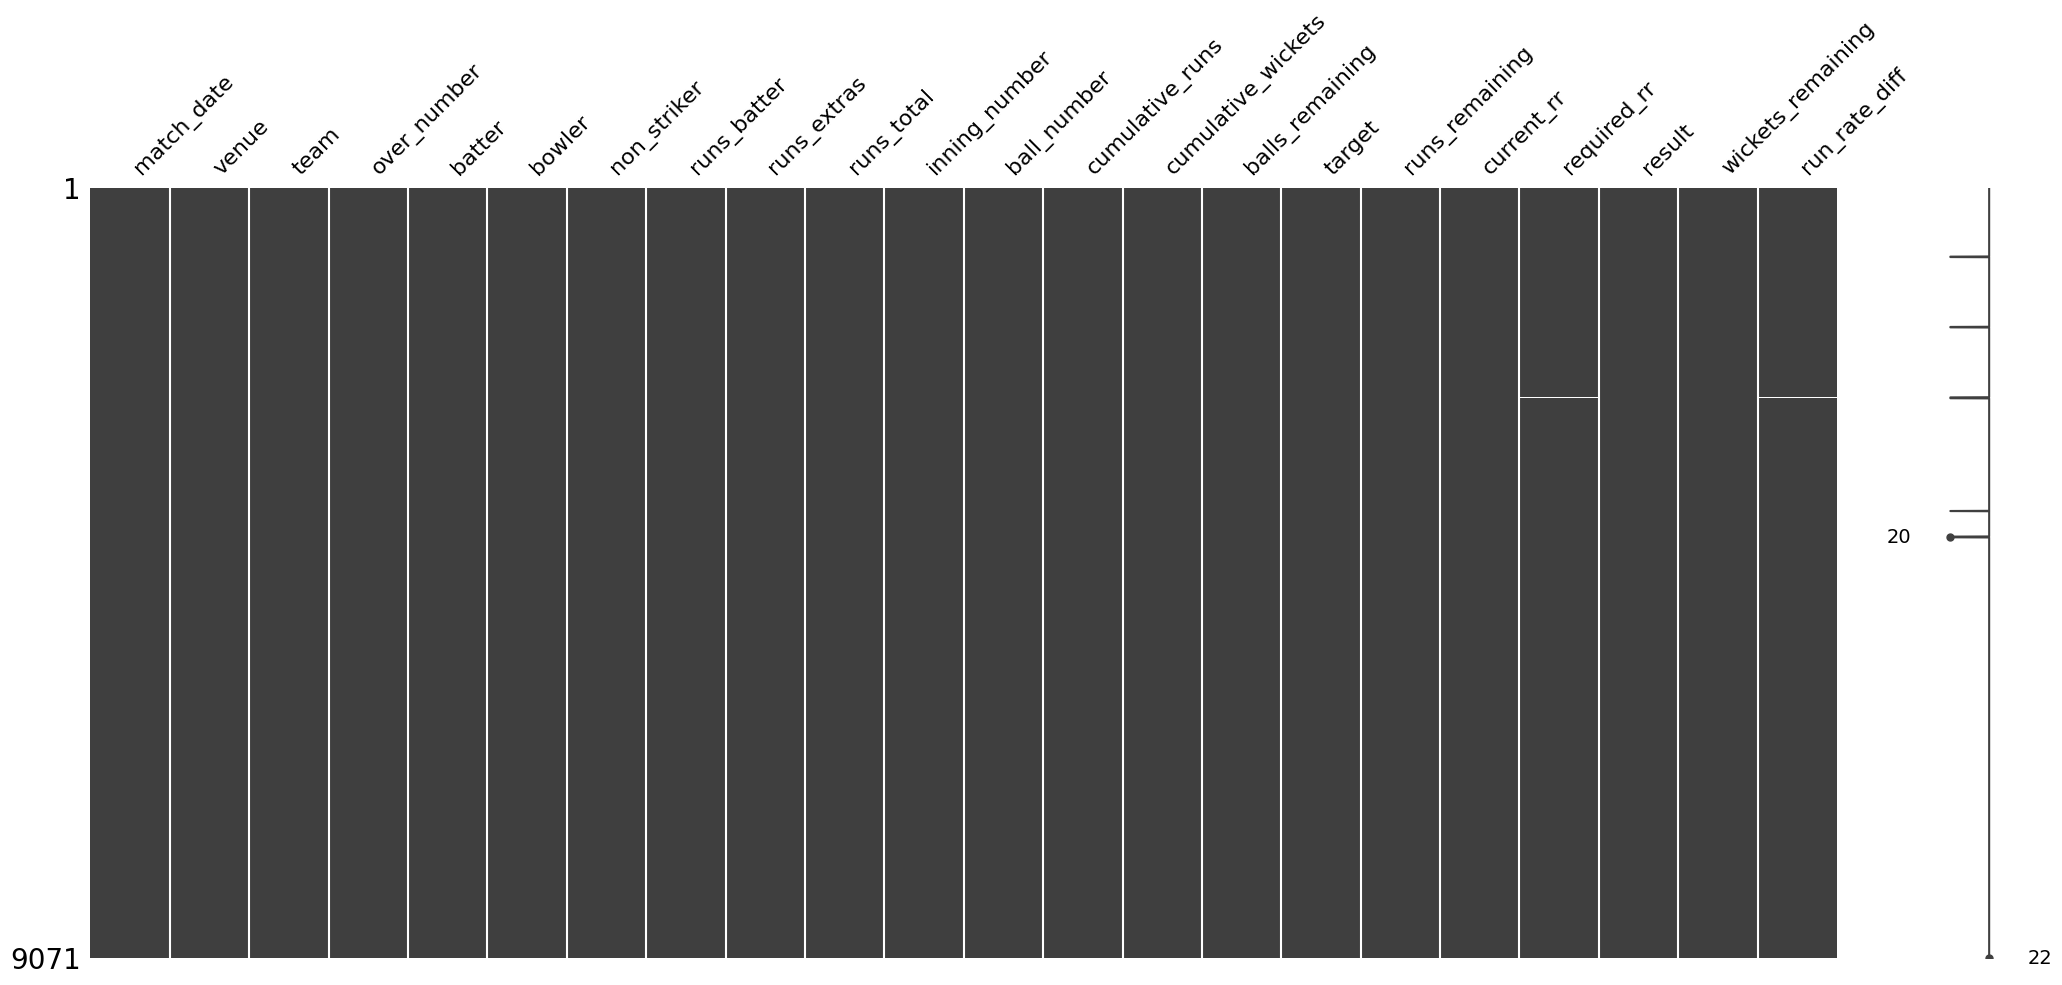

In [115]:
import missingno as msno
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/Final_Merged_Win_Prediction_Dataset.csv")

# Visualize missing values as a bar chart
msno.bar(df2)

# Matrix view — shows NaN locations and density
msno.matrix(df2)

In [116]:
X = X.astype(float)
y = y.astype(int)

In [117]:
print(X.dtypes)
print(y.dtype)

cumulative_runs       float64
cumulative_wickets    float64
ball_number           float64
balls_remaining       float64
runs_remaining        float64
current_rr            float64
required_rr           float64
wickets_remaining     float64
run_rate_diff         float64
over_number           float64
dtype: object
int64


In [118]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

In [120]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

In [121]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:41:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [122]:
# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_xgb = best_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.9917355371900827

In [123]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
# Predict on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # for AUC

In [124]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

Accuracy: 99.17 %


In [125]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       829
           1       0.99      0.99      0.99       986

    accuracy                           0.99      1815
   macro avg       0.99      0.99      0.99      1815
weighted avg       0.99      0.99      0.99      1815



In [126]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[820   9]
 [  6 980]]


In [127]:
# AUC score
auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", round(auc, 4))

ROC AUC Score: 0.9989


In [128]:
!pip install lightgbm
import lightgbm as lgb

In [129]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# Predict and check accuracy
y_pred_lgbm = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy:.4f}")

[LightGBM] [Info] Number of positive: 3940, number of negative: 3316
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1841
[LightGBM] [Info] Number of data points in the train set: 7256, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542999 -> initscore=0.172421
[LightGBM] [Info] Start training from score 0.172421
LightGBM Accuracy: 0.9884


/tmp/ipython-input-130-598883857.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette="Blues_d")
/tmp/ipython-input-130-598883857.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=auc_scores, palette="Greens_d")


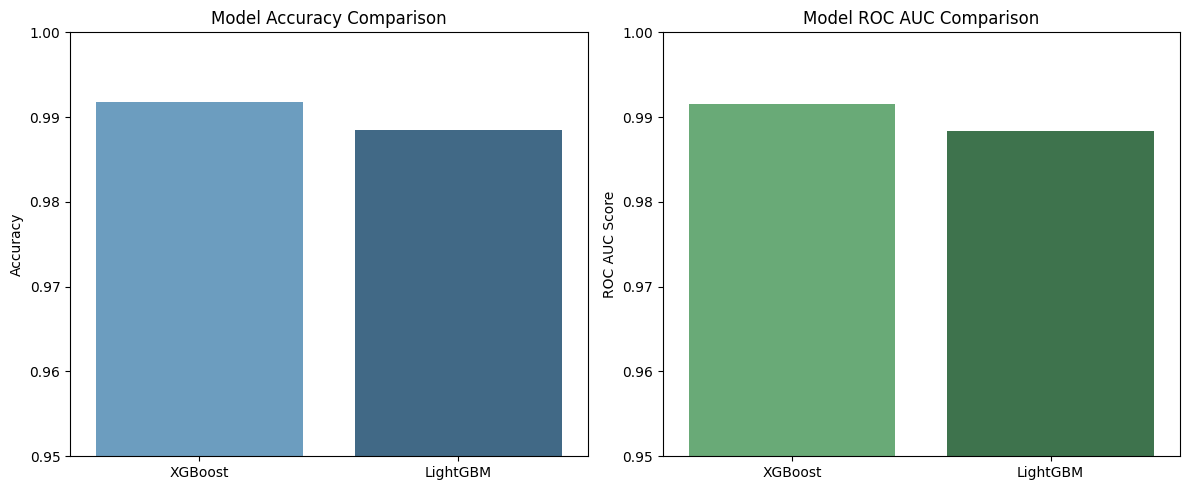

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score


# Compute scores
models = ["XGBoost", "LightGBM"]
accuracy_scores = [
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_lgbm)
]
auc_scores = [
    roc_auc_score(y_test, y_pred_xgb),
    roc_auc_score(y_test, y_pred_lgbm)
]

# Plot comparison
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracy_scores, palette="Blues_d")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.95, 1.0)

# ROC AUC
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=auc_scores, palette="Greens_d")
plt.title("Model ROC AUC Comparison")
plt.ylabel("ROC AUC Score")
plt.ylim(0.95, 1.0)

plt.tight_layout()
plt.show()